# **Placement Data Processing and EDA**

## **1. Introduction**
This document outlines the step-by-step process of loading, cleaning, and analyzing placement data using Python and Pandas. The dataset is extracted from multiple sheets of an Excel file and preprocessed for further analysis and visualization.

## **2. Importing Required Libraries**
- `pandas`: Handles data manipulation and analysis.
- `numpy`: Supports numerical operations.
- `matplotlib.pyplot` & `seaborn`: Used for data visualization.
- `google.colab.files`: Enables downloading files in Google Colab.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **3. Loading Placement Data from Excel**
- Reads an Excel file containing multiple sheets.
- Displays available sheet names.

In [ ]:
placement_data = pd.ExcelFile('/content/DataPlay Dummy Data.xlsx')

In [ ]:
placement_data.sheet_names

['B.Tech CSE',
 'B.Tech ECE',
 'B.Tech EEE',
 'M.Tech CSE',
 'M.Tech ECE',
 'M.Tech EEE']

## **4. Combining Data from Multiple Sheets**
- Merges all sheets into a single DataFrame.
- Maintains data integrity across multiple sheets.


In [ ]:
# combine all sheets
combined_data = pd.DataFrame()
for sheet_name in placement_data.sheet_names:
    sheet_data = pd.read_excel(placement_data, sheet_name=sheet_name)
    combined_data = pd.concat([combined_data, sheet_data], ignore_index=True)

## **5. Saving and Downloading Combined Data**
- Saves the merged dataset as a CSV file.
- Downloads the file for offline use.

In [ ]:
# download the combined sheet
from google.colab import files
combined_data.to_csv('combined_data.csv', encoding = 'utf-8-sig')
files.download('combined_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **6. Loading and Exploring the Combined Data**

- Loads the combined CSV file.

- Displays initial rows, data types, summary statistics, and dataset dimensions.

In [ ]:
placement_data1 = pd.read_csv('/content/combined_data.csv')

In [ ]:
placement_data1.head()

,Unnamed: 0,Roll Number,Name,Course,Branch,Gender,COMPANY,CTC (in LPA),COMPANY,CTC (in LPA).1,COMPANY .1,CTC (in LPA).2,COMPANY .2,Best CTC (in LPA)
0,0,181210001,Yuvraj Singh Champawat,B.Tech,CSE,Male,Tekion Corp.,47.00,Microsoft,44.0,NaN,NaN,Tekion Corp.,47.0
1,1,181210002,Shubham Aggarwal,B.Tech,CSE,Male,Swiggy,31.80,Magicbricks,12.0,NaN,NaN,Swiggy,31.8
2,2,181210003,Sumitra Sivakumar,B.Tech,CSE,Female,Cubastion,6.54,Indiamart,9.5,SRI-N,14.5,SRI-N,14.5
3,3,181210004,Utam Kumar,B.Tech,CSE,Male,Deloitte,7.68,Oracle,16.6,Monster.com,12.5,Oracle,16.6
4,4,181210005,Vartika Chaturvedi,B.Tech,CSE,Female,LTI,6.50,Blogvault,12.0,Samsung R&D Delhi,15.5,Samsung R&d Delhi,15.5


In [ ]:
placement_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         196 non-null    int64  
 1   Roll Number        196 non-null    int64  
 2   Name               196 non-null    object 
 3   Course             196 non-null    object 
 4   Branch             196 non-null    object 
 5   Gender             196 non-null    object 
 6   COMPANY            167 non-null    object 
 7   CTC (in LPA)       167 non-null    float64
 8   COMPANY            95 non-null     object 
 9   CTC (in LPA).1     95 non-null     float64
 10  COMPANY .1         48 non-null     object 
 11  CTC (in LPA).2     48 non-null     float64
 12  COMPANY .2         167 non-null    object 
 13  Best CTC (in LPA)  167 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 21.6+ KB


In [ ]:
placement_data1.describe()

,Unnamed: 0,Roll Number,CTC (in LPA),CTC (in LPA).1,CTC (in LPA).2
count,196.00000,1.960000e+02,167.000000,95.000000,48.000000
mean,97.50000,1.841782e+08,11.426826,14.705263,22.396250
std,56.72448,7.848356e+06,6.743636,6.233433,7.944257
min,0.00000,1.712200e+08,5.000000,5.000000,8.000000
25%,48.75000,1.812100e+08,7.680000,11.885000,15.875000
50%,97.50000,1.812200e+08,9.510000,14.000000,23.300000
75%,146.25000,1.812300e+08,12.300000,16.000000,23.850000
max,195.00000,2.022210e+08,55.000000,45.000000,44.000000


In [ ]:
placement_data1.shape

(196, 14)

In [ ]:
# Check for missing values
placement_data1.isnull().sum()

,0
Unnamed: 0,0
Roll Number,0
Name,0
Course,0
Branch,0
Gender,0
COMPANY,29
CTC (in LPA),29
COMPANY,101
CTC (in LPA).1,101


## **7. Handling Missing Values**
### **Checking Missing Values**

- Identifies missing values in each column.

### **Filling Missing Values**

- Replaces missing numerical values with the column mean.

- Replaces missing categorical values with the most frequent category.

In [ ]:
# Fill missing values (example: fill with mean for numerical columns)
numerical_cols = placement_data1.select_dtypes(include=np.number).columns
placement_data1[numerical_cols] = placement_data1[numerical_cols].fillna(placement_data1[numerical_cols].mean())

In [ ]:
# Fill missing values (example: fill with mode for categorical columns)
categorical_cols = placement_data1.select_dtypes(exclude=np.number).columns
placement_data1[categorical_cols] = placement_data1[categorical_cols].fillna(placement_data1[categorical_cols].mode().iloc[0])

In [ ]:
placement_data1.columns

Index(['Unnamed: 0', 'Roll Number', 'Name', 'Course', 'Branch', 'Gender',
       'COMPANY', 'CTC (in LPA)', 'COMPANY ', 'CTC (in LPA).1', 'COMPANY .1',
       'CTC (in LPA).2', 'COMPANY .2', 'Best CTC (in LPA)'],
      dtype='object')

In [ ]:
placement_data1.isnull().sum()

,0
Unnamed: 0,0
Roll Number,0
Name,0
Course,0
Branch,0
Gender,0
COMPANY,0
CTC (in LPA),0
COMPANY,0
CTC (in LPA).1,0


In [ ]:
placement_data1.shape

(196, 14)

In [ ]:
placement_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         196 non-null    int64  
 1   Roll Number        196 non-null    int64  
 2   Name               196 non-null    object 
 3   Course             196 non-null    object 
 4   Branch             196 non-null    object 
 5   Gender             196 non-null    object 
 6   COMPANY            196 non-null    object 
 7   CTC (in LPA)       196 non-null    float64
 8   COMPANY            196 non-null    object 
 9   CTC (in LPA).1     196 non-null    float64
 10  COMPANY .1         196 non-null    object 
 11  CTC (in LPA).2     196 non-null    float64
 12  COMPANY .2         196 non-null    object 
 13  Best CTC (in LPA)  196 non-null    object 
dtypes: float64(3), int64(2), object(9)
memory usage: 21.6+ KB


In [ ]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in placement_data1.columns:
    placement_data1 = placement_data1.drop('Unnamed: 0', axis=1)

In [ ]:
# Set a global style for visualizations
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## **9. Data Visualization & Exploratory Data Analysis (EDA)**


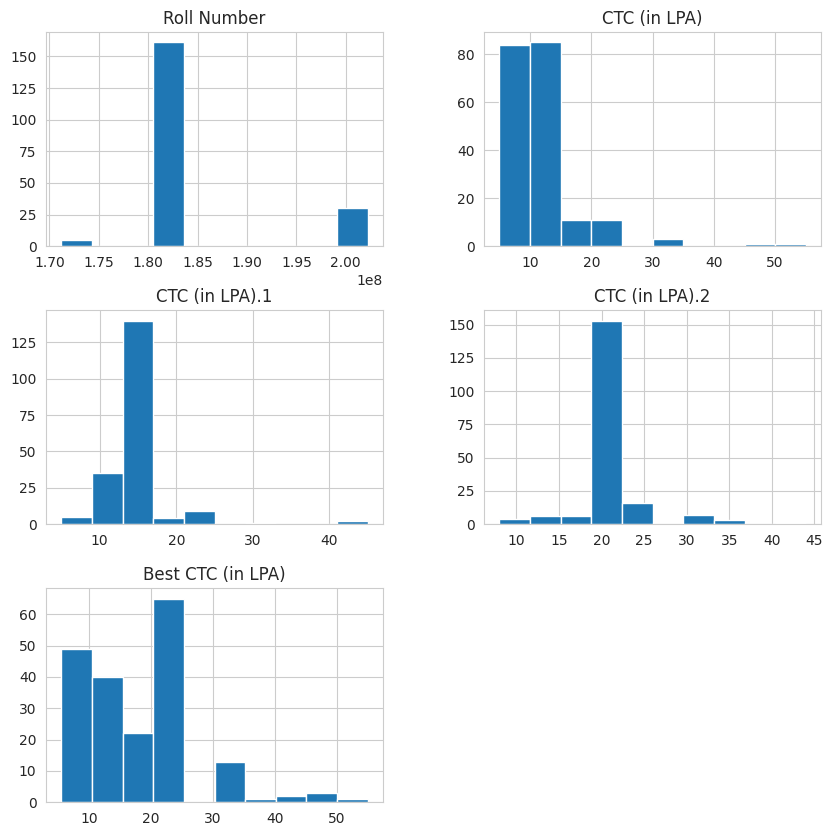

In [ ]:
# Explore data distributions (example: histograms for numerical features)
placement_data1.hist(figsize=(10, 10));
plt.show()

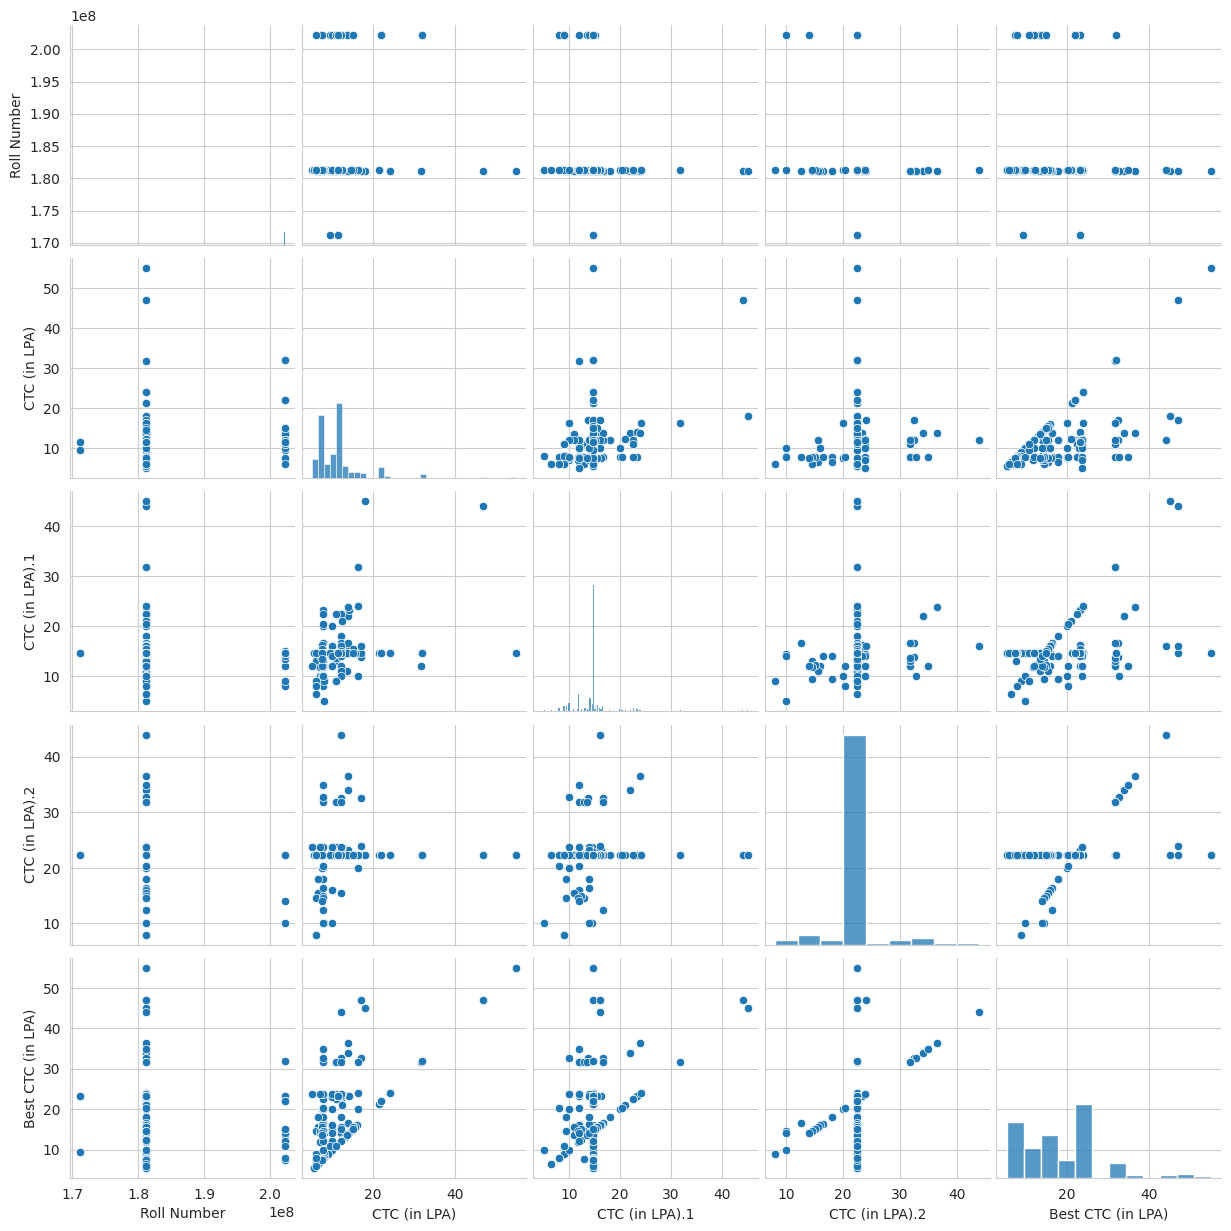

In [ ]:
# Explore relationships between features (example: scatter plots)
sns.pairplot(placement_data1);
plt.show()

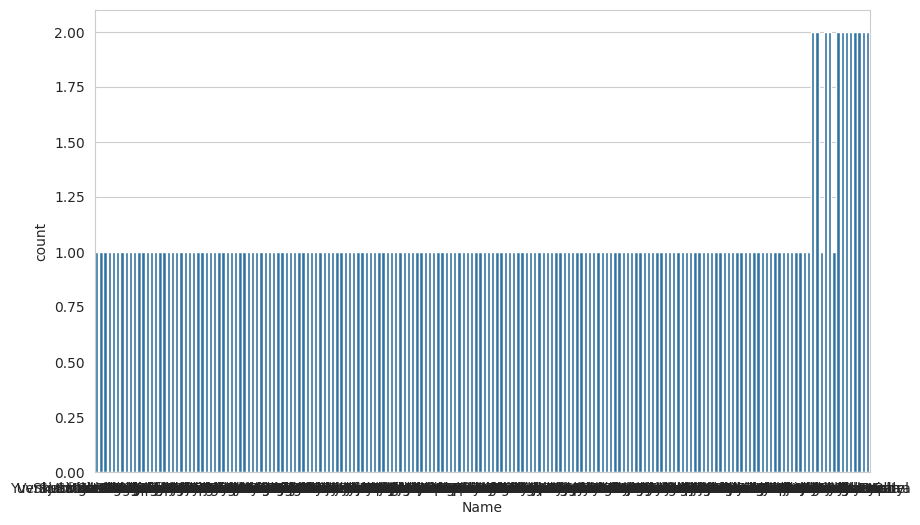

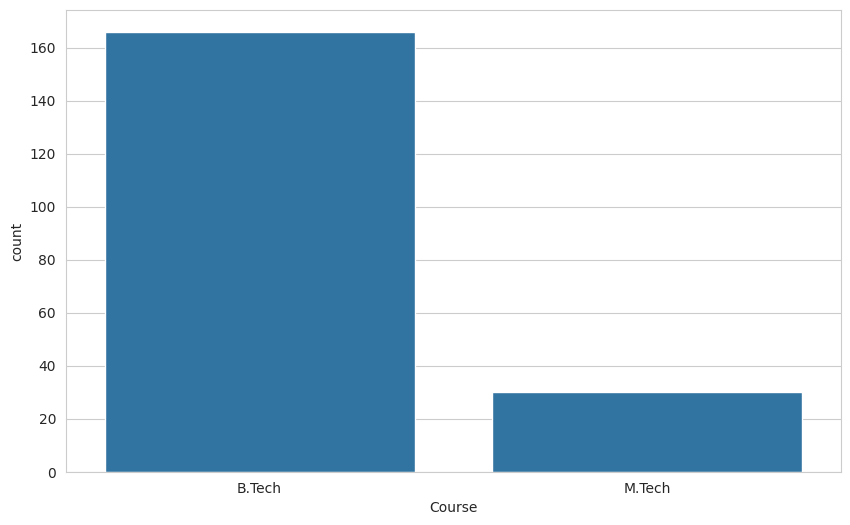

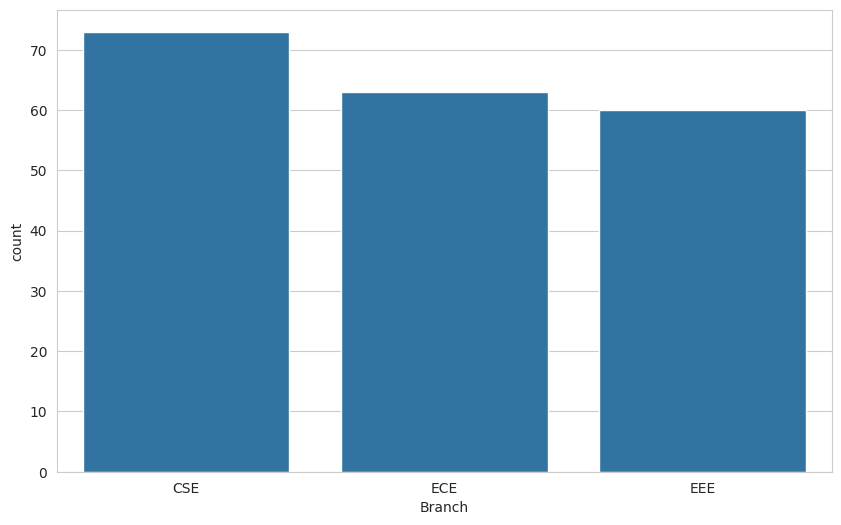

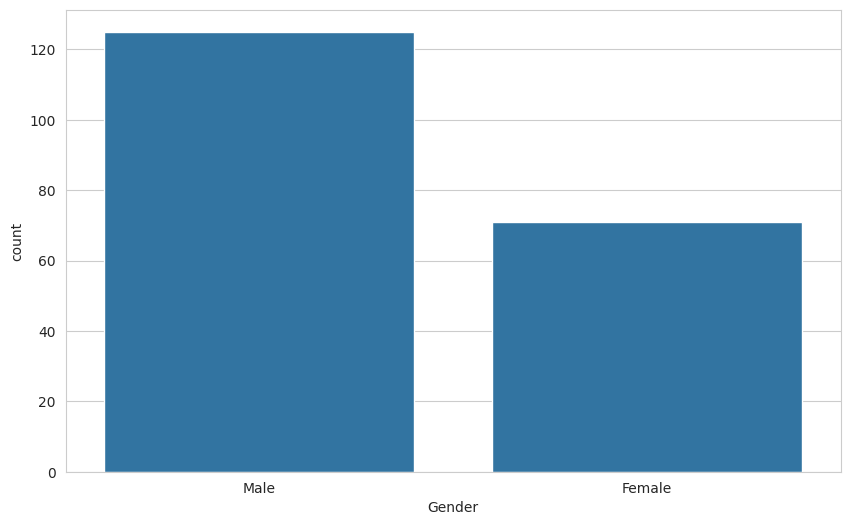

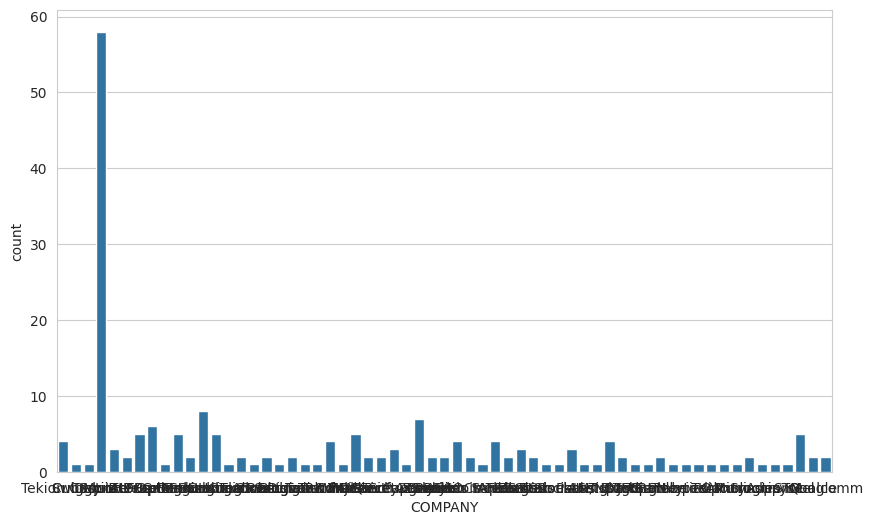

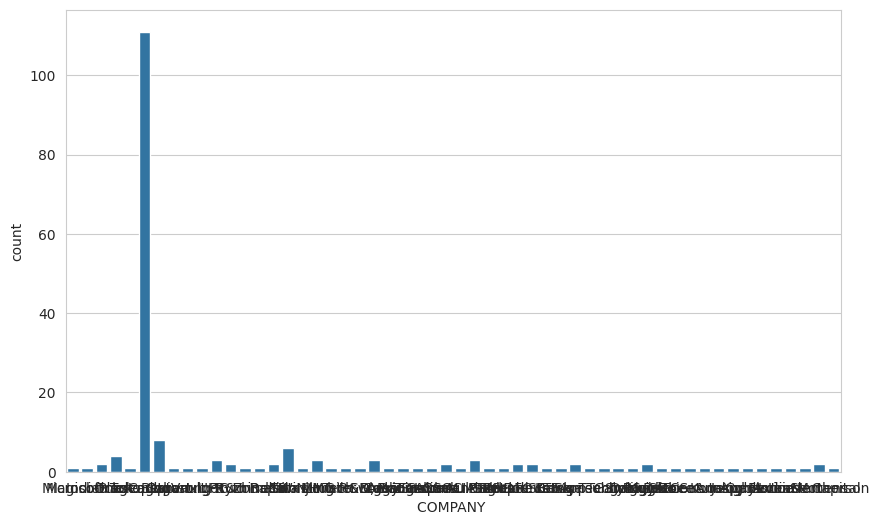

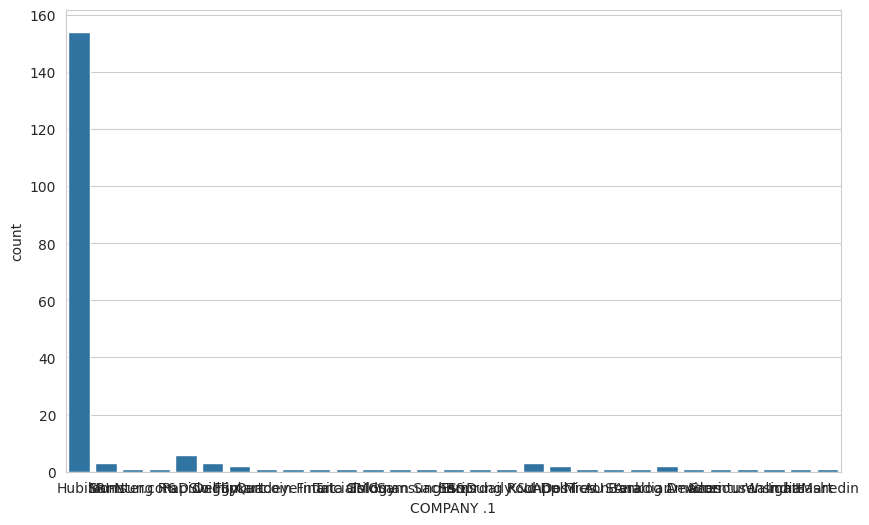

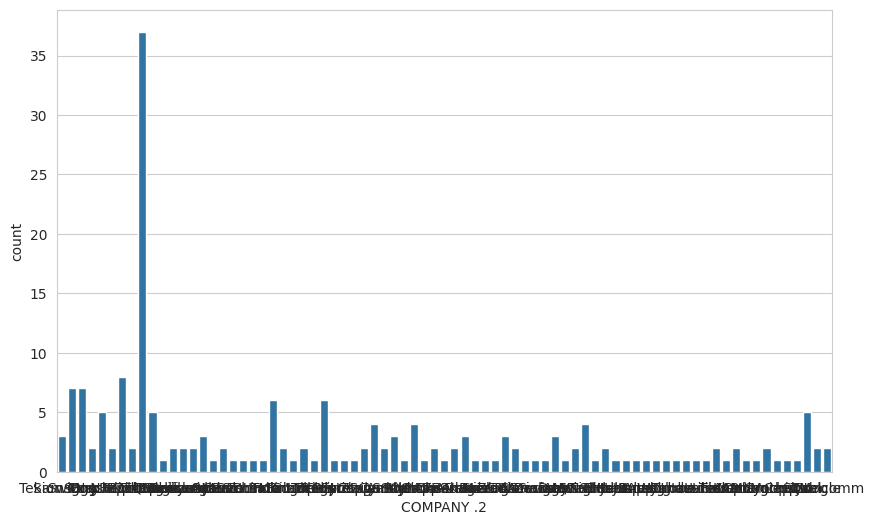

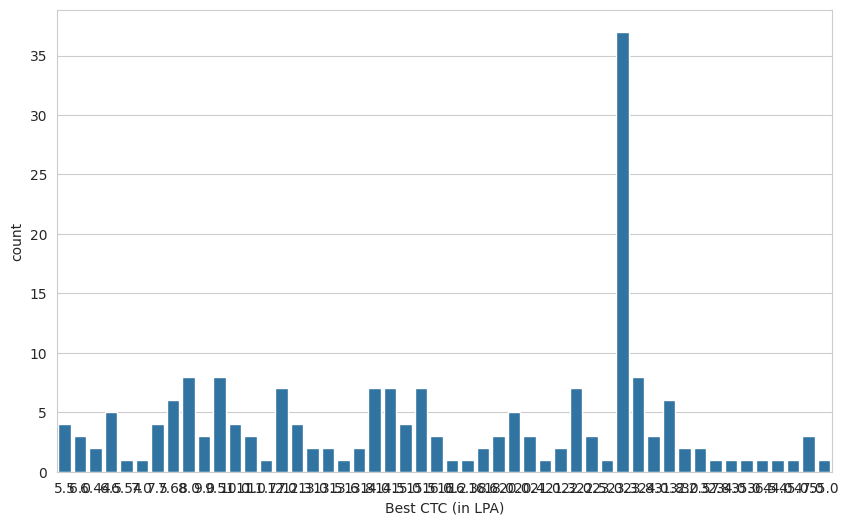

In [ ]:
# Explore categorical features (example: count plots)
for col in categorical_cols:
    sns.countplot(x=col, data=placement_data1)
    plt.show()

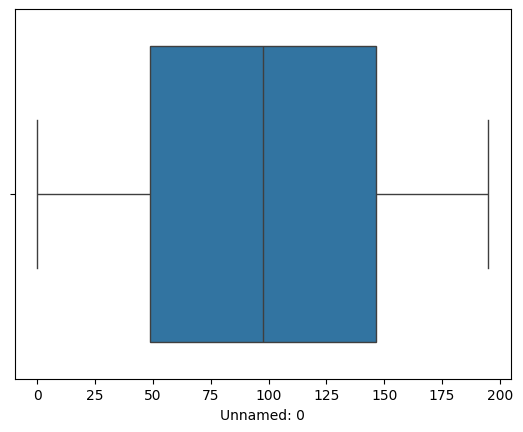

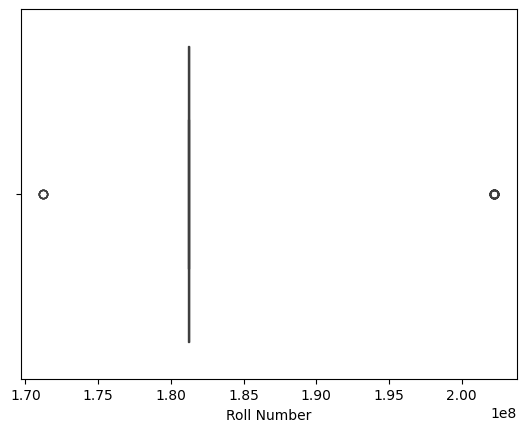

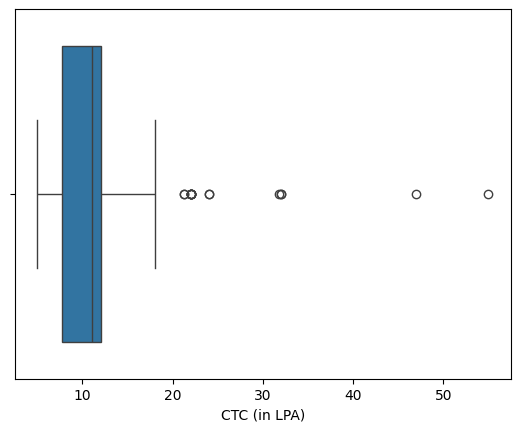

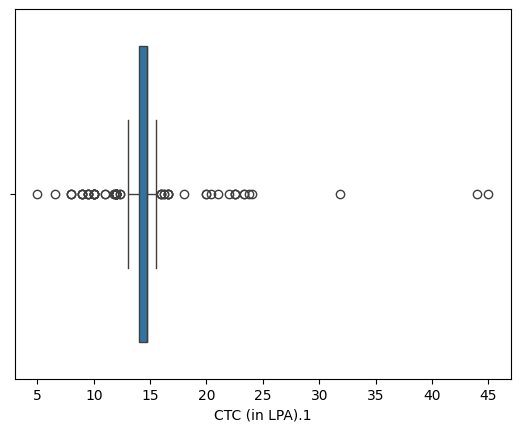

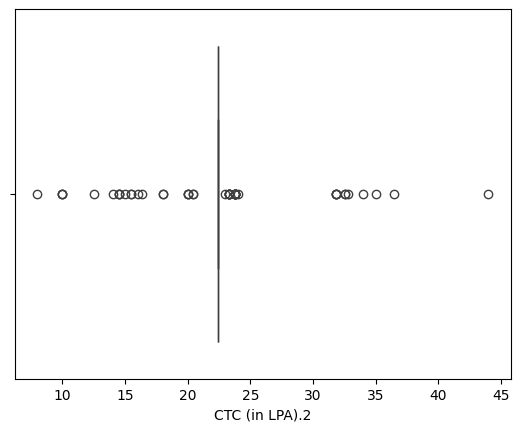

In [ ]:
# Box plots to visualize outliers
for col in numerical_cols:
    sns.boxplot(x=col, data=placement_data1)
    plt.show()


Gender
Male      125
Female     71
Name: count, dtype: int64


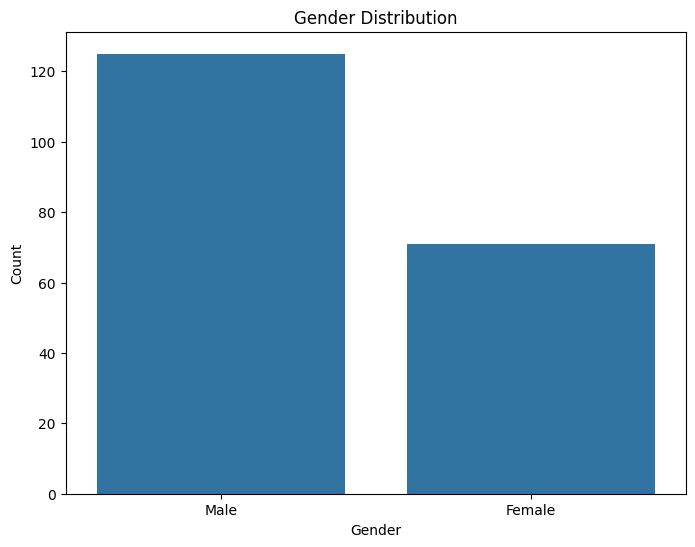

,proportion
Gender,
Male,63.77551
Female,36.22449


In [ ]:
# Gender Distribution Analysis
gender_counts = placement_data1['Gender'].value_counts()
print(gender_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=placement_data1)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Calculate gender proportions
gender_proportions = placement_data1['Gender'].value_counts(normalize=True) * 100
gender_proportions


Branch
CSE    73
ECE    63
EEE    60
Name: count, dtype: int64


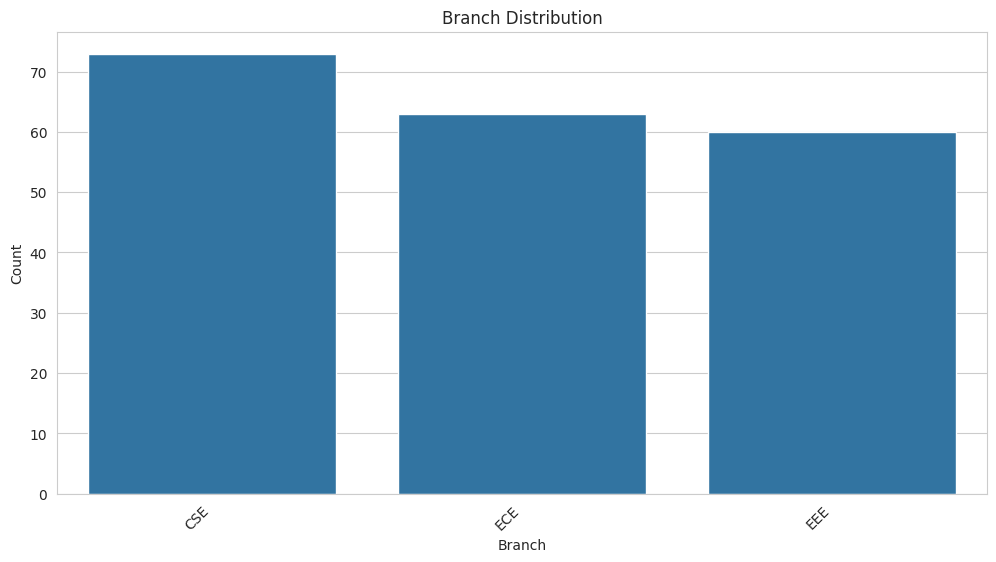

,proportion
Branch,
CSE,37.244898
ECE,32.142857
EEE,30.612245


In [ ]:
# Branch Distribution Analysis
branch_counts = placement_data1['Branch'].value_counts()
print(branch_counts)

plt.figure(figsize=(12, 6))
sns.countplot(x='Branch', data=placement_data1)
plt.title('Branch Distribution')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Calculate branch proportions
branch_proportions = placement_data1['Branch'].value_counts(normalize=True) * 100
branch_proportions


In [ ]:
placement_data1.columns

Index(['Roll Number', 'Name', 'Course', 'Branch', 'Gender', 'COMPANY',
       'CTC (in LPA)', 'COMPANY ', 'CTC (in LPA).1', 'COMPANY .1',
       'CTC (in LPA).2', 'COMPANY .2', 'Best CTC (in LPA)'],
      dtype='object')

In [ ]:
placement_data1.shape

(196, 13)

## **12. Saving Cleaned Data**


In [ ]:
# Save the cleaned and processed DataFrame to a new CSV file
placement_data1.to_csv('cleaned_combined_data.csv', encoding='utf-8-sig', index=False)
files.download('cleaned_combined_data.csv')
print('Sucess')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sucess


## **13. Conclusion**
This notebook successfully:
1. **Merged** multiple sheets of placement data into a single dataset.
2. **Cleaned** the dataset by handling missing values and removing redundant columns.
3. **Explored** the data using descriptive statistics and visualizations.
4. **Analyzed** gender and branch distributions.
5. **Saved** the processed dataset for further modeling and analysis.

This cleaned data can now be used for visualization in Power BI or Tableau**.

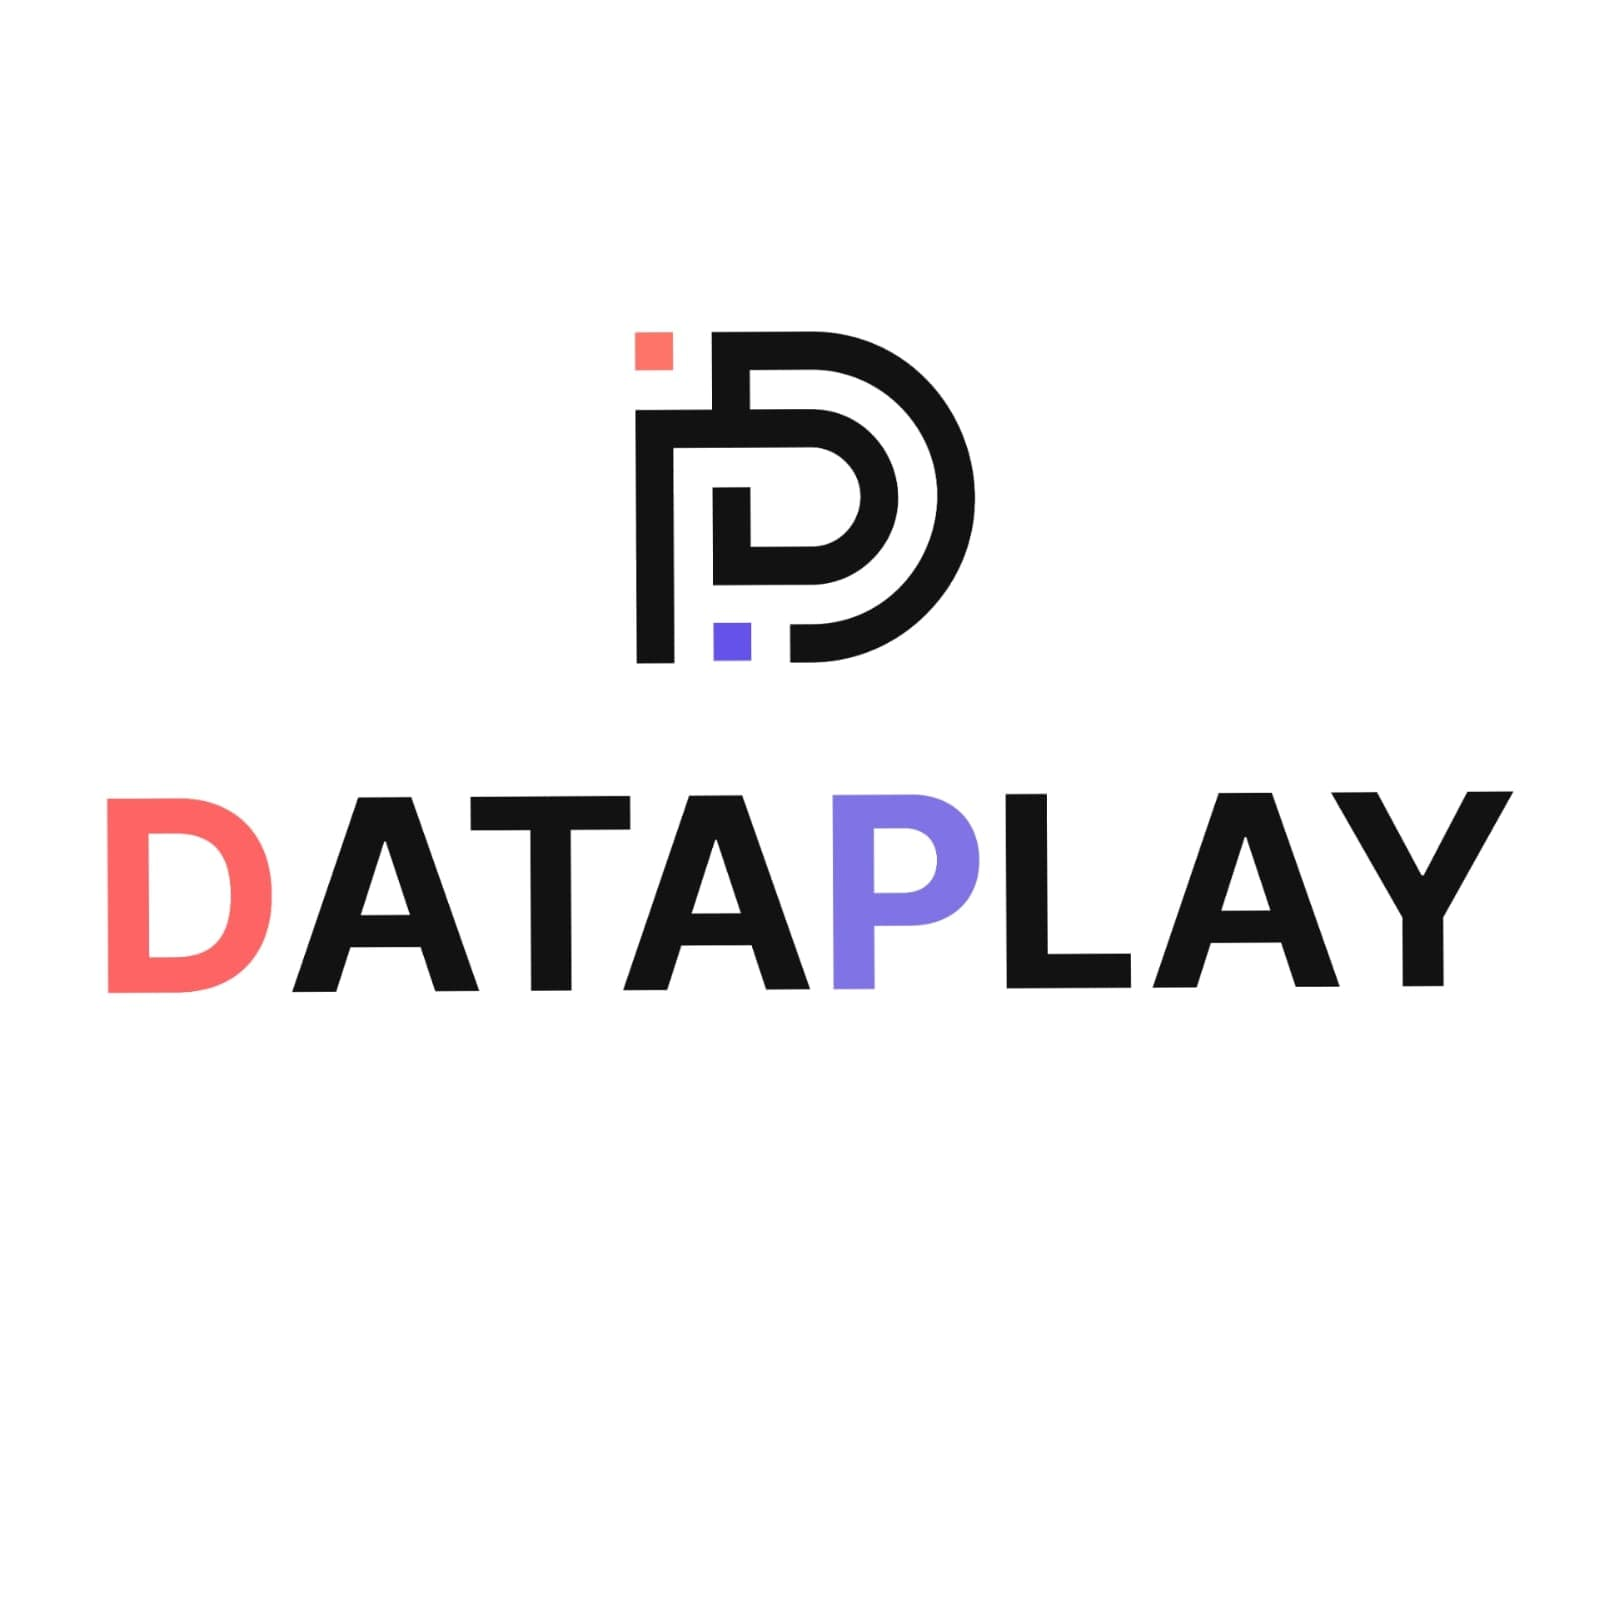